In [1]:
import os
import pandas as pd
import git
import matplotlib.pyplot as plt
import folderstats
import numpy as np
import math

In [2]:
def expected_operations(N,k,p):
    if(k==0.0):
        k=N
    number_of_pools = np.ceil(N/k)
    number_of_positive_pools = (1 - np.power((1-p),k)) * number_of_pools
    return np.ceil(number_of_pools + number_of_positive_pools*k)

def expected_writes(N,k,p):
    if(k==0.0):
        k=N
    number_of_pools = np.ceil(N/k)
    return number_of_pools

def expected_scrubbing(N,k,p):
    if(k==0.0):
        k=N
    number_of_pools = np.ceil(N/k)
    number_of_positive_pools = (1 - np.power((1-p),k))* number_of_pools
    return np.ceil(number_of_positive_pools*k)

def optimal_pool_size(N,p):
    if(p<=0.0):
        return N
    return np.ceil(1.24*np.power(p,-0.466))
# poc_ropsten.ipynb
gasAmount = 50870

In [3]:
folder = "../../data/format-corpus"
relative_path = '../../data/format-corpus'
repo = git.Git(folder)
df = folderstats.folderstats(folder, ignore_hidden=True,hash_name="sha256")
df = df[df.folder==False]
df.head()

,id,path,name,extension,size,atime,mtime,ctime,folder,num_files,depth,parent,uid,sha256
0,4,../../data/format-corpus\desktop-publishing\In...,Neddy_Flyer_ft_HeatherRyan,jpg,1620612,2022-05-02 12:12:52,2022-03-22 11:00:24,2022-03-22 11:00:24,False,NaN,2,3,0,9d89cc0347adeb5141e4feea3d411b0fd2252c63145e1c...
1,5,../../data/format-corpus\desktop-publishing\In...,Neddy_Flyer_HeatherRyan,indd,1503232,2022-05-02 12:12:52,2022-03-22 11:00:24,2022-03-22 11:00:24,False,NaN,2,3,0,8f206d618c0161cfddf4c18aa3932ed99d9e500bf1260c...
2,6,../../data/format-corpus\desktop-publishing\In...,Neddy_Flyer_HeatherRyan,pdf,59106,2022-05-02 12:12:52,2022-03-22 11:00:24,2022-03-22 11:00:24,False,NaN,2,3,0,6a3c9444d4905c8896a717be7c30ee7d20b3c319eb2d3d...
3,7,../../data/format-corpus\desktop-publishing\In...,Neddy_Flyer_README_HeatherRyan.md,rtf,1232,2022-05-02 12:12:52,2022-03-22 11:00:24,2022-03-22 11:00:24,False,NaN,2,3,0,3ef3b90e7bf9e863d1ae9f862eaa5e1cd87e8f9ef67438...
6,11,../../data/format-corpus\disk-images\fat12\opf...,blank-untitled-volume,img,1474560,2022-05-02 12:12:52,2022-03-22 11:00:24,2022-03-22 11:00:24,False,NaN,3,10,0,039713487932afa67bd3c024e4d6284aac5548092d8b9b...


In [4]:
N = df.shape[0]
print("N={}".format(N))
df = df[["path","name","extension","size","sha256"]]
df["changes"] = df.apply(lambda row: len(repo.log("--oneline",os.path.relpath(row.path, relative_path)).splitlines()) - 1 ,axis=1)
df["extension"]=df["extension"].fillna("None")
df.head()

N=1560


,path,name,extension,size,sha256,changes
0,../../data/format-corpus\desktop-publishing\In...,Neddy_Flyer_ft_HeatherRyan,jpg,1620612,9d89cc0347adeb5141e4feea3d411b0fd2252c63145e1c...,0
1,../../data/format-corpus\desktop-publishing\In...,Neddy_Flyer_HeatherRyan,indd,1503232,8f206d618c0161cfddf4c18aa3932ed99d9e500bf1260c...,0
2,../../data/format-corpus\desktop-publishing\In...,Neddy_Flyer_HeatherRyan,pdf,59106,6a3c9444d4905c8896a717be7c30ee7d20b3c319eb2d3d...,0
3,../../data/format-corpus\desktop-publishing\In...,Neddy_Flyer_README_HeatherRyan.md,rtf,1232,3ef3b90e7bf9e863d1ae9f862eaa5e1cd87e8f9ef67438...,0
6,../../data/format-corpus\disk-images\fat12\opf...,blank-untitled-volume,img,1474560,039713487932afa67bd3c024e4d6284aac5548092d8b9b...,0


In [5]:
s1 = df["extension"].value_counts().rename("N")
s2 = df.loc[df["changes"]>0].groupby(["extension"])["changes"].count().rename("positives")
df_ = pd.concat([s1, s2], axis=1)
df_["positives"] = df_["positives"].fillna(0)
df_.head()

,N,positives
xml,986,432.0
pdf,106,2.0
md,74,17.0
mov,61,0.0
java,47,39.0


In [6]:
df_["N"].sum()

1560

510.0


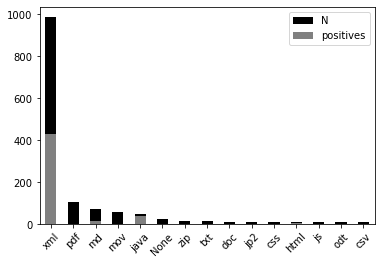

In [7]:
_, ax = plt.subplots()
df_["N"][:15].plot(kind='bar', ax=ax, color='black',rot=45)
df_["positives"][:15].plot(kind='bar', ax=ax, color='grey',rot=45)
positives = df_["positives"].sum()
print(positives)
ax.legend()

In [8]:
df_["p"] = df_.apply(lambda row: row.positives/row.N,axis=1).clip(upper=1)
df_ = df_.sort_values(by=["N"],ascending=False)
df_[:15]

,N,positives,p
xml,986,432.0,0.438134
pdf,106,2.0,0.018868
md,74,17.0,0.229730
mov,61,0.0,0.000000
java,47,39.0,0.829787
None,26,0.0,0.000000
zip,17,0.0,0.000000
txt,14,2.0,0.142857
doc,13,0.0,0.000000
jp2,12,0.0,0.000000


In [9]:


df_["k"] = df_.apply(lambda row: optimal_pool_size(row.N,row.p),axis=1)
df_["O(S_cs)"] = df_.apply(lambda row:  expected_operations(row.N,row.k,row.p),axis=1)
df_["W(S_cs)"] = df_.apply(lambda row:  expected_writes(row.N,row.k,row.p),axis=1)
df_["E(S_cs)"] = df_.apply(lambda row: expected_operations(row.N,1,row.p)/row["O(S_cs)"],axis=1)
df_["C(S_cs)"] = df_.apply(lambda row: expected_writes(row.N,1,row.p)/row["W(S_cs)"],axis=1)
df_[:15]

,N,positives,p,k,O(S_cs),W(S_cs),E(S_cs),C(S_cs)
xml,986,432.0,0.438134,2.0,1168.0,493.0,1.214041,2.000000
pdf,106,2.0,0.018868,8.0,30.0,14.0,3.600000,7.571429
md,74,17.0,0.229730,3.0,66.0,25.0,1.378788,2.960000
mov,61,0.0,0.000000,61.0,1.0,1.0,61.000000,61.000000
java,47,39.0,0.829787,2.0,71.0,24.0,1.211268,1.958333
None,26,0.0,0.000000,26.0,1.0,1.0,26.000000,26.000000
zip,17,0.0,0.000000,17.0,1.0,1.0,17.000000,17.000000
txt,14,2.0,0.142857,4.0,12.0,4.0,1.333333,3.500000
doc,13,0.0,0.000000,13.0,1.0,1.0,13.000000,13.000000
jp2,12,0.0,0.000000,12.0,1.0,1.0,12.000000,12.000000


In [10]:
print(df_["W(S_cs)"].sum())
print(df_["O(S_cs)"].sum())

662.0
1491.0


In [11]:

print("E(S_cs)={}".format(df_["E(S_cs)"].mean()))
print("C(S_cs)={}".format(df_["C(S_cs)"].mean()))


E(S_cs)=3.289795148187626
C(S_cs)=3.4852354788069078


In [12]:
N=df_["N"].sum()
p = positives/N
# p=df_["p"].mean()
k=optimal_pool_size(N,p)
print(N)
print(p)
print(k)
print("E(S_h)={}".format(expected_operations(N,1,p)/expected_operations(N,k,p)))
print("C(S_h)={}".format(expected_writes(N,1,p)/expected_writes(N,k,p)))
expected_operations(N,k,p)

1560
0.3269230769230769
3.0
E(S_h)=1.2897196261682242
C(S_h)=3.0


1605.0

In [13]:
print("E(S_cs)={}".format(expected_operations(N,1,p)/df_["O(S_cs)"].sum()))
print("C(S_cs)={}".format(expected_writes(N,1,p)/df_["W(S_cs)"].sum()))

E(S_cs)=1.3883299798792756
C(S_cs)=2.3564954682779455


In [14]:
print(expected_operations(N,1,p))
print(expected_writes(N,1,p))

2070.0
1560.0


In [15]:
N

1560

In [26]:
gas = 520*42368
gas

22031360

In [27]:
gas * 0.00000005 * 4000

4406.272